<a href="https://colab.research.google.com/github/anjithababuraj/Projects/blob/main/SVM_Pizza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

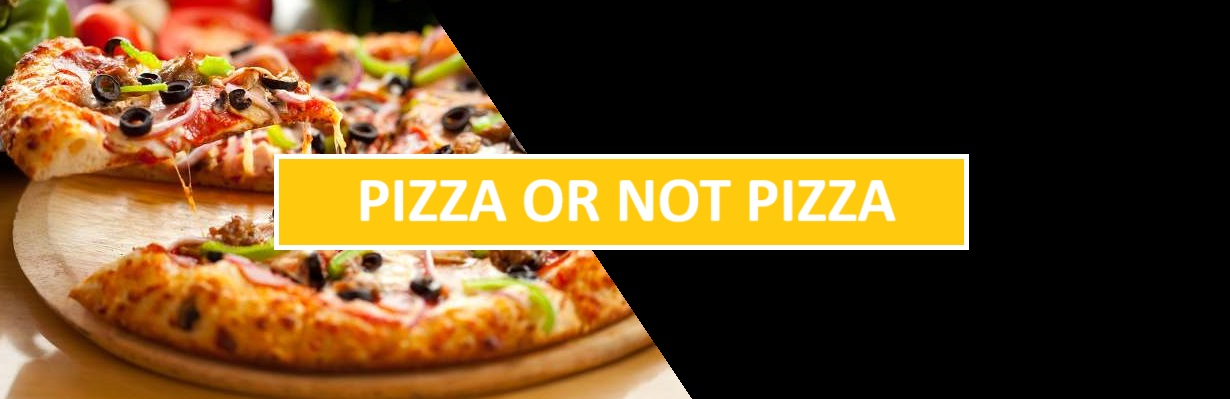

In [ ]:
# drive mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os # to define filepath
from skimage.io import imread # to read images
from skimage.transform import resize # to normalize image size
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [ ]:
# to list contents in folder
os.listdir('/content/drive/MyDrive/pizza_not_pizza')

['pizza', 'not_pizza']

In [ ]:
# no. of images in the folder pizza
len(os.listdir('/content/drive/MyDrive/pizza_not_pizza/pizza'))

993

In [ ]:
# no. of images in the folder not_pizza
len(os.listdir('/content/drive/MyDrive/pizza_not_pizza/not_pizza'))

983

In [ ]:
# to assign path of pizza to the variable pizzapath
pizzapath=os.path.join('/content/drive/MyDrive/pizza_not_pizza','pizza')

In [ ]:
for img in os.listdir(pizzapath):
  print(img)

1083380.jpg
1107714.jpg
1038357.jpg
106507.jpg
1040878.jpg
105910.jpg
1055065.jpg
1097980.jpg
1105700.jpg
1089334.jpg
1008941.jpg
1011404.jpg
1069629.jpg
1084888.jpg
1044524.jpg
1033251.jpg
1060407.jpg
1032754.jpg
1065078.jpg
1106738.jpg
1098197.jpg
1076699.jpg
102037.jpg
1048649.jpg
1001116.jpg
1067986.jpg
1008144.jpg
103708.jpg
1026922.jpg
1008844.jpg
1008104.jpg
1035854.jpg
1029698.jpg
1054420.jpg
1088332.jpg
1044789.jpg
1265335.jpg
1159797.jpg
1173913.jpg
111051.jpg
1209973.jpg
121960.jpg
1260554.jpg
1234172.jpg
1223284.jpg
11297.jpg
1202925.jpg
1248478.jpg
1179703.jpg
1207213.jpg
1226346.jpg
12301.jpg
1165451.jpg
1137400.jpg
1228171.jpg
1119571.jpg
1243215.jpg
1180273.jpg
124815.jpg
1183278.jpg
1245628.jpg
1123386.jpg
121834.jpg
1205154.jpg
1220156.jpg
1138936.jpg
1248346.jpg
1110966.jpg
1183595.jpg
1247645.jpg
1157438.jpg
1152100.jpg
1202689.jpg
1180001.jpg
1143057.jpg
1383291.jpg
1284978.jpg
139952.jpg
1327402.jpg
138855.jpg
1312761.jpg
1351631.jpg
1351146.jpg
129536.jpg
1289139

In [ ]:
# to assign path of not_pizza to the variable notpizzapath
notpizzapath=os.path.join('/content/drive/MyDrive/pizza_not_pizza','not_pizza')

In [ ]:
for img in os.listdir(notpizzapath):
  print(img)

1018802.jpg
1020735.jpg
1012312.jpg
1009225.jpg
1005746.jpg
108055.jpg
1130533.jpg
1081875.jpg
1123352.jpg
102839.jpg
1070772.jpg
1100403.jpg
1121757.jpg
1114354.jpg
109276.jpg
1092114.jpg
1027142.jpg
1050956.jpg
1097049.jpg
1070867.jpg
1088005.jpg
1118613.jpg
104773.jpg
1054362.jpg
1045400.jpg
1066151.jpg
107499.jpg
1125094.jpg
113375.jpg
1112272.jpg
1062097.jpg
1093016.jpg
1103380.jpg
1083749.jpg
109681.jpg
1097999.jpg
1043233.jpg
123191.jpg
1165123.jpg
1205412.jpg
1159401.jpg
114483.jpg
1150857.jpg
1189793.jpg
1162608.jpg
1168041.jpg
1228631.jpg
1147356.jpg
1230414.jpg
1250025.jpg
1227349.jpg
1248568.jpg
1175395.jpg
1247622.jpg
1244695.jpg
1251235.jpg
1170905.jpg
123902.jpg
1183445.jpg
1155798.jpg
1138747.jpg
1217672.jpg
1185654.jpg
1170730.jpg
1225708.jpg
1168154.jpg
1146828.jpg
1220269.jpg
1221380.jpg
117282.jpg
1226137.jpg
1227358.jpg
1172480.jpg
1180225.jpg
128673.jpg
1358862.jpg
1349536.jpg
138753.jpg
1323906.jpg
1252200.jpg
1349179.jpg
1252840.jpg
1260663.jpg
1309938.jpg
13809

In [ ]:
feature_arr=[]  # to collect input data
target_arr=[]   # to collect output data
categories=['pizza','not_pizza']
sourcepath='/content/drive/MyDrive/pizza_not_pizza'

In [ ]:
for i in categories:
  print("Loading categories............")
  path=os.path.join(sourcepath,i)
  for img in os.listdir(path):
    img_arr=imread(os.path.join(path,img))
    img_resize=resize(img_arr,(150,150,3))
    feature_arr.append(img_resize.flatten())
    target_arr.append(categories.index(i))
  print("Loaded completely.............",i)

Loading categories............
Loaded completely............. pizza
Loading categories............
Loaded completely............. not_pizza


In [ ]:
# input and output are converted from list to array
feature=np.array(feature_arr)
target=np.array(target_arr)

In [ ]:
# create dataframe
data=pd.DataFrame(feature)
data.shape

(1976, 67500)

In [ ]:
# to add target to dataframe
data['target']=target
data.shape

(1976, 67501)

In [ ]:
# separate x as input and y as ouput
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [ ]:
# split the data into training ang testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [ ]:
# SVM model creation
model=SVC()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [ ]:
# model performance evaluation
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.70      0.72       303
           1       0.70      0.73      0.72       290

    accuracy                           0.72       593
   macro avg       0.72      0.72      0.72       593
weighted avg       0.72      0.72      0.72       593



In [ ]:
path1='/content/drive/MyDrive/pizza_img.jpg'
img=imread(path1)
img=resize(img,(150,150,3)).flatten().reshape(1,-1)
model.predict(img)  # it is a image of pizza

array([0])

In [ ]:
path2='/content/drive/MyDrive/burger_img.jpg'
img=imread(path2)
img=resize(img,(150,150,3)).flatten().reshape(1,-1)
model.predict(img)  # it is not an image of pizza

array([1])